In [240]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Importing dataset for 2013-2023 and combining the dataset to visualize the trends. Combined_df used for the merged datasets

In [243]:
import glob

# path to the files 
path = "poverty_*.csv"
files = glob.glob(path)

# Extract year from filename and add it as a column
df_list = []
for file in files:
    year = int(file.split('_')[-1].split('.')[0]) 
    df = pd.read_csv(file)
    df['year'] = year
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)


In [245]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 8 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Label (Grouping)                                                                          655 non-null    object
 1   Boston city, Suffolk County, Massachusetts!!Total!!Estimate                               583 non-null    object
 2   Boston city, Suffolk County, Massachusetts!!Total!!Margin of Error                        583 non-null    object
 3   Boston city, Suffolk County, Massachusetts!!Below poverty level!!Estimate                 583 non-null    object
 4   Boston city, Suffolk County, Massachusetts!!Below poverty level!!Margin of Error          583 non-null    object
 5   Boston city, Suffolk County, Massachusetts!!Percent below poverty

In [247]:
combined_df.head()

,Label (Grouping),"Boston city, Suffolk County, Massachusetts!!Total!!Estimate","Boston city, Suffolk County, Massachusetts!!Total!!Margin of Error","Boston city, Suffolk County, Massachusetts!!Below poverty level!!Estimate","Boston city, Suffolk County, Massachusetts!!Below poverty level!!Margin of Error","Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Estimate","Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Margin of Error",year
0,Population for whom poverty status is determined,"651,689","±5,184","111,442","±8,138",17.1%,±1.2,2019
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,Under 18 years,"104,108","±3,210","25,043","±4,676",24.1%,±4.4,2019
3,Under 5 years,"31,264","±2,040","5,210","±1,759",16.7%,±5.5,2019
4,5 to 17 years,"72,844","±2,636","19,833","±3,973",27.2%,±5.3,2019


In [249]:
print(combined_df['year'].unique())

[2019 2018 2021 2023 2022 2013 2015 2014 2016 2017]


In [251]:
# Sort the DataFrame by the 'year' column
combined_df.sort_values(by='year', inplace=True)

# Reset the index 
combined_df.reset_index(drop=True, inplace=True)
print(combined_df['year'].unique())

print(combined_df.columns)

[2013 2014 2015 2016 2017 2018 2019 2021 2022 2023]
Index(['Label (Grouping)',
       'Boston city, Suffolk County, Massachusetts!!Total!!Estimate',
       'Boston city, Suffolk County, Massachusetts!!Total!!Margin of Error',
       'Boston city, Suffolk County, Massachusetts!!Below poverty level!!Estimate',
       'Boston city, Suffolk County, Massachusetts!!Below poverty level!!Margin of Error',
       'Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Estimate',
       'Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Margin of Error',
       'year'],
      dtype='object')


In [253]:
combined_df.columns = [
    "label", "total_estimate", "total_margin_error", 
    "below_poverty_estimate", "below_poverty_margin_error",
    "percent_below_poverty_estimate", "percent_below_poverty_margin_error", "year"
]


In [255]:
def clean_string_columns(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.replace('\xa0', '', regex=False).str.strip()
    return df

# Clean the entire DataFrame
combined_df = clean_string_columns(combined_df)

# Verify the cleaned data
print(combined_df['label'].unique())

['Worked full-time, year-round in the past 12 months' 'SEX'
 '65 years and over' '18 to 64 years' 'Related children under 18 years'
 'Under 18 years' 'AGE' 'Population for whom poverty status is determined'
 'Worked part-time or part-year in the past 12 months' 'Did not work'
 'All Individuals below:' '50 percent of poverty level' 'Male'
 '125 percent of poverty level' '185 percent of poverty level'
 '200 percent of poverty level'
 'Unrelated individuals for whom poverty status is determined' 'Female'
 'Mean income deficit for unrelated individuals (dollars)'
 'Worked less than full-time, year-round in the past 12 months'
 'PERCENT IMPUTED' 'Poverty status for individuals'
 '150 percent of poverty level' 'Population 16 years and over' 'One race'
 'WORK EXPERIENCE' 'Unemployed' 'Employed'
 'Civilian labor force 16 years and over' 'EMPLOYMENT STATUS'
 "Bachelor's degree or higher" "Some college, associate's degree"
 'High school graduate (includes equivalency)'
 'RACE AND HISPANIC OR LAT

In [257]:
(combined_df.head())

,label,total_estimate,total_margin_error,below_poverty_estimate,below_poverty_margin_error,percent_below_poverty_estimate,percent_below_poverty_margin_error,year
0,"Worked full-time, year-round in the past 12 mo...","225,670","±5,704","4,245","±1,703",1.9%,±0.7,2013
1,SEX,NaN,NaN,NaN,NaN,NaN,NaN,2013
2,65 years and over,"65,127","±1,930","11,903","±1,440",18.3%,±2.2,2013
3,18 to 64 years,"432,336","±3,386","86,576","±5,543",20.0%,±1.2,2013
4,Related children under 18 years,"104,877","±2,588","31,272","±4,001",29.8%,±3.7,2013


# Visualizing total population vs below poverty line population over the years

Population Trend DataFrame:
     year  total_population  below_poverty_population  \
7    2013          602704.0                  130115.0   
76   2014          612873.0                  138625.0   
142  2015          626152.0                  128385.0   
188  2016          628333.0                  131871.0   
286  2017          642003.0                  119925.0   
370  2018          653169.0                  118946.0   
380  2019          651689.0                  111442.0   
495  2021          610081.0                  114198.0   
576  2022          608933.0                  103901.0   
586  2023          608599.0                   95207.0   

    percent_below_poverty_population  
7                              21.6%  
76                             22.6%  
142                            20.5%  
188                            21.0%  
286                            18.7%  
370                            18.2%  
380                            17.1%  
495                            1

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/3683699628.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_population['total_estimate'] = total_population['total_estimate'].str.replace(',', '').astype(float)


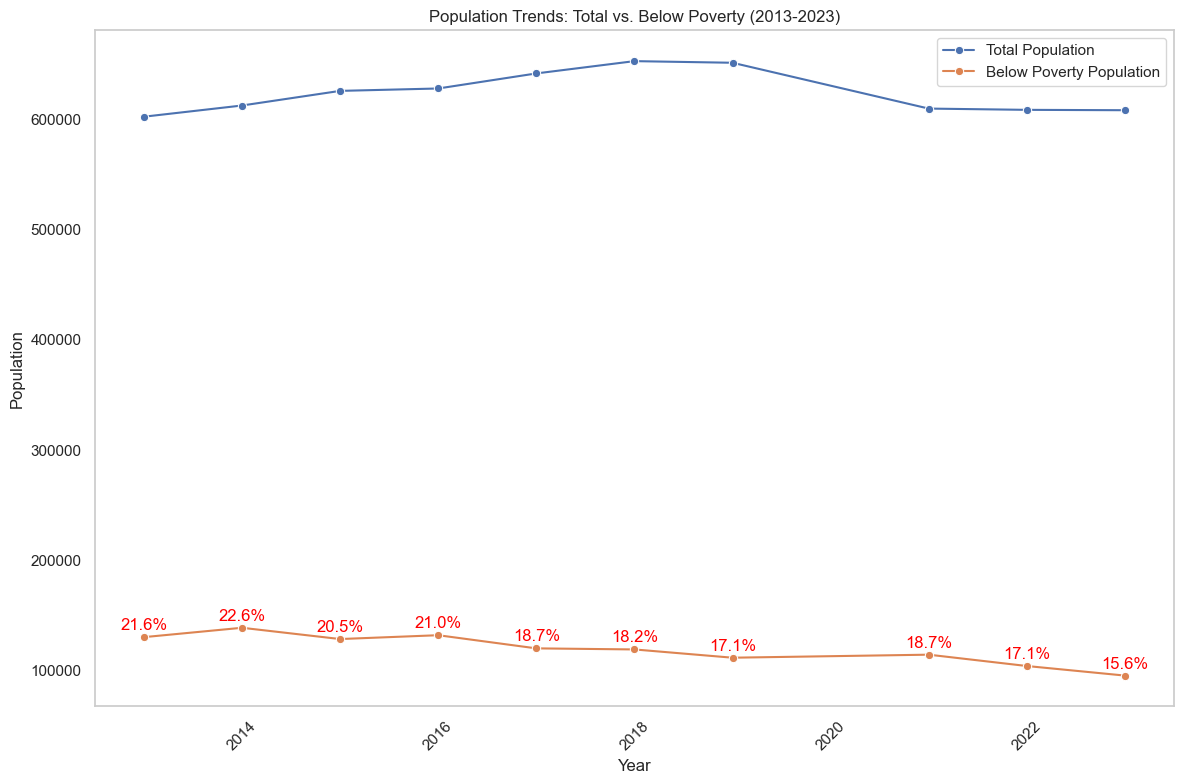

In [260]:
# total population vs bpl population over the years
total_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
]

# Extract below poverty estimates for all years directly
below_poverty_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
][['year', 'below_poverty_estimate']].copy()

percent_below_poverty_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
][['year', 'percent_below_poverty_estimate']].copy()

# Clean the below poverty estimate values
below_poverty_population['below_poverty_estimate'] = below_poverty_population['below_poverty_estimate'].str.replace(',', '').astype(float)
percent_below_poverty_population['percent_below_poverty_estimate'] = percent_below_poverty_population['percent_below_poverty_estimate'].str.replace(',', '')

total_population['total_estimate'] = total_population['total_estimate'].str.replace(',', '').astype(float)

# Create DataFrame for plotting
population_trend = pd.DataFrame({
    'year': total_population['year'],
    'total_population': total_population['total_estimate'],
    'below_poverty_population': below_poverty_population['below_poverty_estimate'],
    'percent_below_poverty_population': percent_below_poverty_population['percent_below_poverty_estimate']
})

# Check the Population Trend DataFrame
print("Population Trend DataFrame:")
print(population_trend)

# plot
plt.figure(figsize=(12, 8))

# Plot total population
sns.lineplot(data=population_trend, x='year', y='total_population', label='Total Population', marker='o')

# Plot below poverty population
sns.lineplot(data=population_trend, x='year', y='below_poverty_population', label='Below Poverty Population', marker='o')

for i in range(len(population_trend)):
    plt.annotate(population_trend['percent_below_poverty_population'].iloc[i], 
                 (population_trend['year'].iloc[i], population_trend['below_poverty_population'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0, 5),  
                 ha='center', 
                 color='red')

# Add labels and title
plt.title("Population Trends: Total vs. Below Poverty (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [262]:
total_population_2013 = population_trend.loc[population_trend['year'] == 2013, 'total_population'].values[0]
below_poverty_population_2013 = population_trend.loc[population_trend['year'] == 2013, 'below_poverty_population'].values[0]

total_population_2023 = population_trend.loc[population_trend['year'] == 2023, 'total_population'].values[0]
below_poverty_population_2023 = population_trend.loc[population_trend['year'] == 2023, 'below_poverty_population'].values[0]

# Calculate percentages
percentage_below_poverty_2013 = (below_poverty_population_2013 / total_population_2013) * 100
percentage_below_poverty_2023 = (below_poverty_population_2023 / total_population_2023) * 100

#  Calculate the difference
percentage_change = percentage_below_poverty_2023 - percentage_below_poverty_2013

#  Print the results
print(f"Percentage Below Poverty Line in 2013: {percentage_below_poverty_2013:.2f}%")
print(f"Percentage Below Poverty Line in 2023: {percentage_below_poverty_2023:.2f}%")
print(f"Change in Percentage from 2013 to 2023: {percentage_change:.2f}%")

Percentage Below Poverty Line in 2013: 21.59%
Percentage Below Poverty Line in 2023: 15.64%
Change in Percentage from 2013 to 2023: -5.94%


# Poverty Rate trends based on age groups

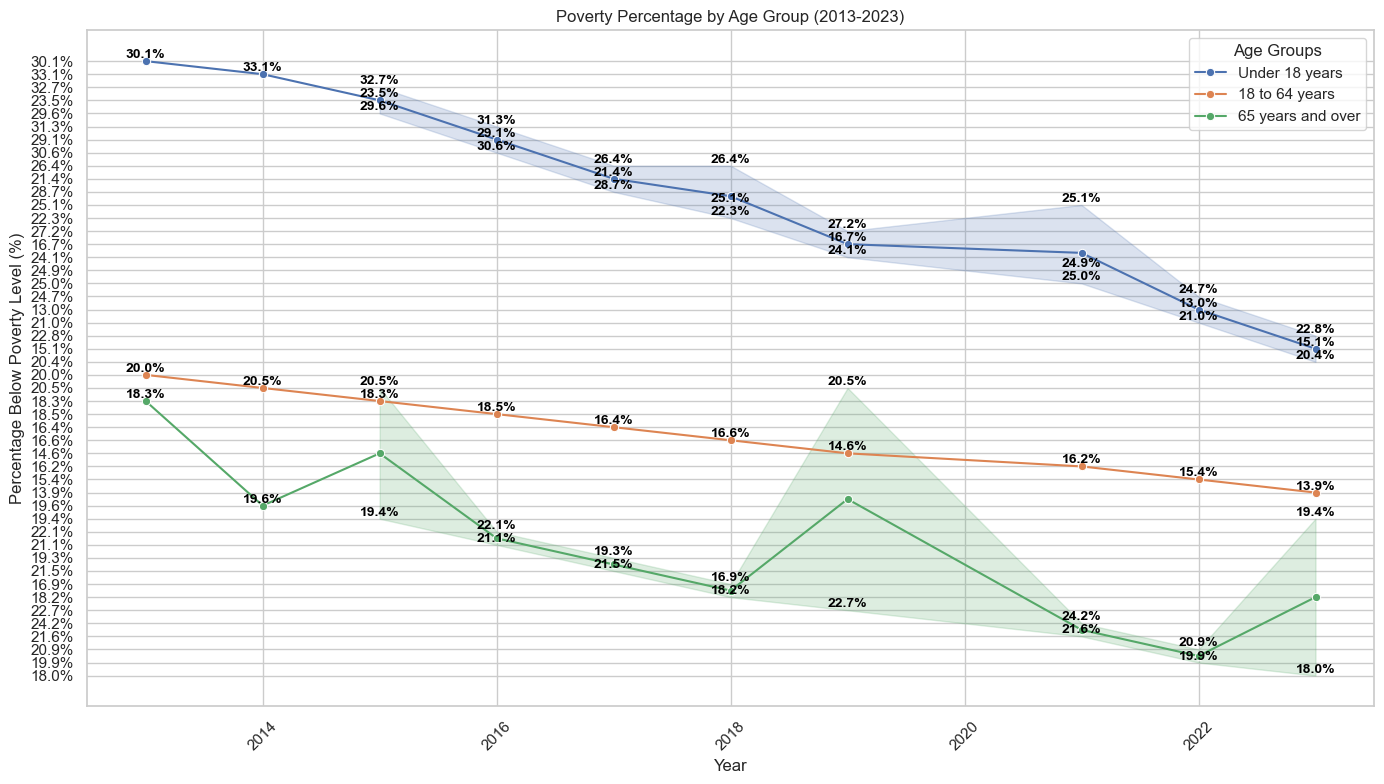

In [265]:
combined_df['age_group'] = combined_df['label'].apply(lambda x: 
                                                     'Under 18 years' if x in ['Under 5 years', '5 to 17 years'] 
                                                     else '18 to 64 years' if x == '18 to 64 years' 
                                                     else '65 years and over' if x in ['60 years and over', '65 and over'] 
                                                     else x)

# Clean up percentage data by removing commas and converting to floats
combined_df['percent_below_poverty_estimate'] = (
    combined_df['percent_below_poverty_estimate']
    .str.replace(',', '')
)

# Desired age groups to plot
desired_age_groups = ["Under 18 years", "18 to 64 years", "65 years and over"]

# Filter data for only the desired age groups
filtered_df = combined_df[combined_df['age_group'].isin(desired_age_groups)]

# Initialize plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot each desired age group separately
for age_group in desired_age_groups:
    age_group_data = filtered_df[filtered_df['age_group'] == age_group]
    sns.lineplot(
        data=age_group_data,
        x='year',
        y='percent_below_poverty_estimate',
        label=age_group,
        marker='o'
    )
    
    # Annotate each data point with the percentage value
    for index, row in age_group_data.iterrows():
        plt.text(row['year'], row['percent_below_poverty_estimate'], 
                 f"{row['percent_below_poverty_estimate']:}", 
                 horizontalalignment='center', 
                 verticalalignment='bottom', 
                 size='small', color='black', weight='semibold')

# Add plot labels and title
plt.title("Poverty Percentage by Age Group (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Percentage Below Poverty Level (%)")
plt.xticks(rotation=45)
plt.legend(title="Age Groups")
plt.grid(True)
plt.tight_layout()
plt.show()

# Poverty trends based on gender

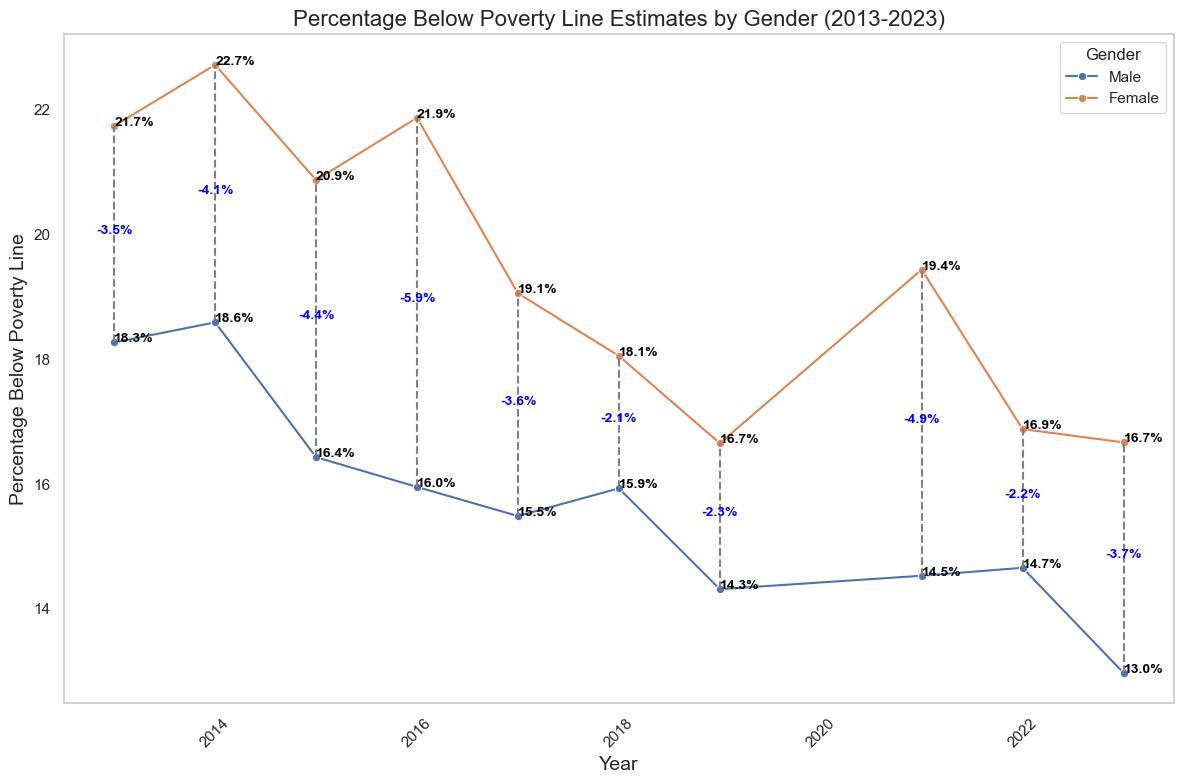

In [268]:
male_data = combined_df[combined_df['label'] == 'Male']
female_data = combined_df[combined_df['label'] == 'Female']

# Step 2: Calculate Percentages Over the Years
# Create a list to hold results
results = []

# Function to clean and convert estimates to float
def clean_and_convert(series):
    return series.str.replace(',', '').astype(float)

# Calculate for Males
for year in male_data['year'].unique():
    total_population = clean_and_convert(male_data[male_data['year'] == year]['total_estimate']).sum()
    below_poverty_population = clean_and_convert(male_data[male_data['year'] == year]['below_poverty_estimate']).sum()
    percentage = (below_poverty_population / total_population) * 100 if total_population > 0 else 0
    results.append({'year': year, 'gender': 'Male', 'percentage_below_poverty': percentage})

# Calculate for Females
for year in female_data['year'].unique():
    total_population = clean_and_convert(female_data[female_data['year'] == year]['total_estimate']).sum()
    below_poverty_population = clean_and_convert(female_data[female_data['year'] == year]['below_poverty_estimate']).sum()
    percentage = (below_poverty_population / total_population) * 100 if total_population > 0 else 0
    results.append({'year': year, 'gender': 'Female', 'percentage_below_poverty': percentage})

# Convert results to DataFrame
percentages_df = pd.DataFrame(results)

# Pivot the DataFrame for easier calculations
pivoted_df = percentages_df.pivot(index='year', columns='gender', values='percentage_below_poverty')

# Calculate percentage difference
pivoted_df['percentage_difference'] = pivoted_df['Male'] - pivoted_df['Female']
pivoted_df.reset_index(inplace=True)

# Now we need to prepare the data for plotting
melted_data = percentages_df.copy()

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the primary line graph for percentage below poverty line
lineplot = sns.lineplot(data=melted_data, x='year', y='percentage_below_poverty', hue='gender', marker='o')

# Adding annotations for percentages
for index, row in percentages_df.iterrows():
    lineplot.text(row['year'], row['percentage_below_poverty'], f"{row['percentage_below_poverty']:.1f}%", 
                  horizontalalignment='left', size='small', color='black', weight='semibold')

# Draw lines between Male and Female percentage points
for index, row in pivoted_df.iterrows():
    plt.plot([row['year'], row['year']], [row['Male'], row['Female']], color='gray', linestyle='--')
    # Annotate the percentage difference
    plt.text(row['year'], (row['Male'] + row['Female']) / 2, 
             f"{row['percentage_difference']:.1f}%", 
             horizontalalignment='center', color='blue', fontsize=10, weight='bold')

# Set titles and labels
plt.title("Percentage Below Poverty Line Estimates by Gender (2013-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage Below Poverty Line", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend(title="Gender")
plt.show()

# Poverty trends based on race

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/2594180077.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['below_poverty_estimate'] = clean_and_convert(race_df['below_poverty_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/2594180077.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['total_estimate'] = clean_and_convert(race_df['total_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/2594180077.py:22: SettingWi

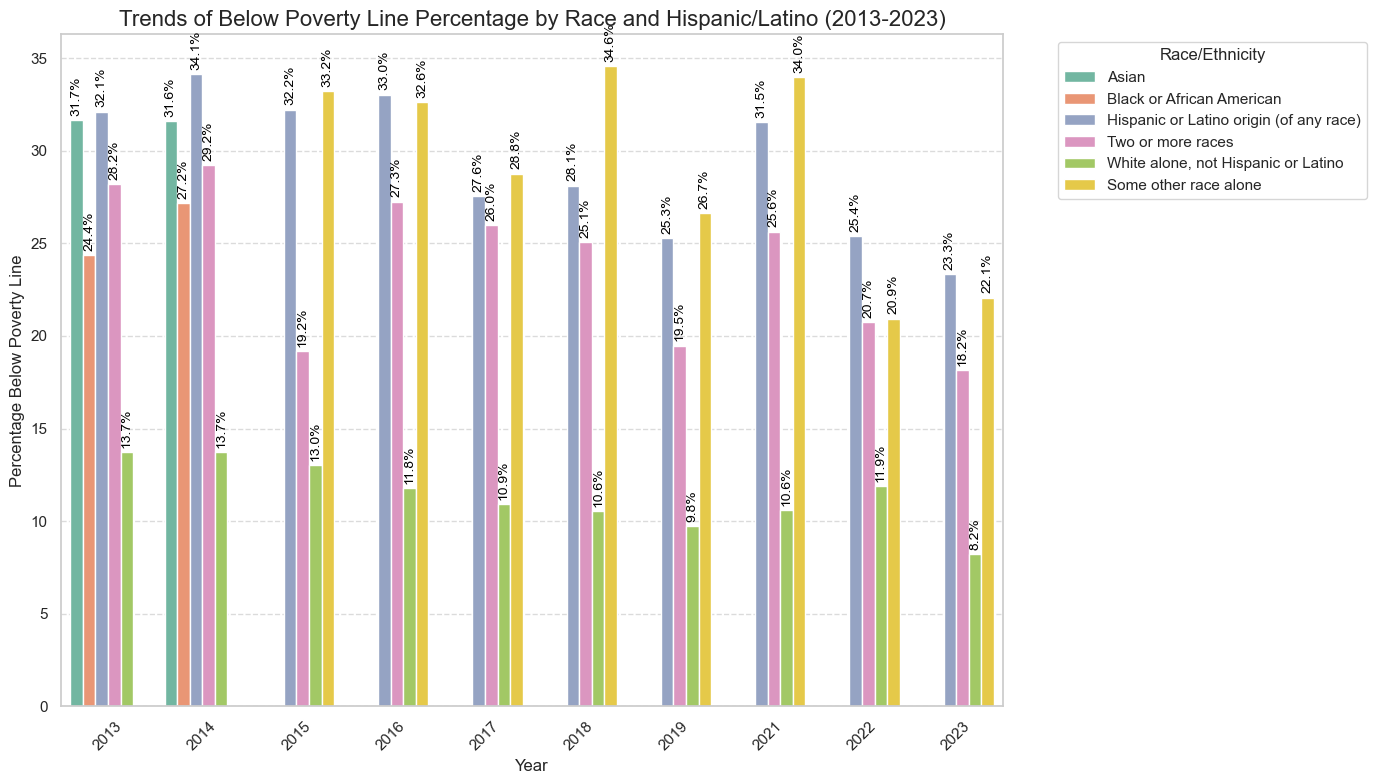

In [271]:
# Define race categories and filter the DataFrame
race_categories = [
    'White alone, not Hispanic or Latino',
    'Black or African American',
    'Asian',
    'Hispanic or Latino origin (of any race)',
    'American Indian and Alaska Native',
    'Native Hawaiian and Other Pacific Islander',
    'Some other race alone',
    'Two or more races'
]

race_df = combined_df[combined_df['label'].isin(race_categories)]

# Clean and convert data function
def clean_and_convert(column):
    column = column.str.replace(',', '', regex=False) 
    return pd.to_numeric(column, errors='coerce')      

race_df['below_poverty_estimate'] = clean_and_convert(race_df['below_poverty_estimate'])
race_df['total_estimate'] = clean_and_convert(race_df['total_estimate'])
race_df.dropna(subset=['below_poverty_estimate', 'total_estimate'], inplace=True)

# Calculate percentage below poverty line
race_df['percent_below_poverty'] = (race_df['below_poverty_estimate'] / race_df['total_estimate']) * 100

# Group and pivot data for plots
race_trend = race_df.groupby(['year', 'label'])['percent_below_poverty'].mean().reset_index()
pivot_df = race_trend.pivot(index='year', columns='label', values='percent_below_poverty')


# Bar plot with percentage annotations
plt.figure(figsize=(14, 8))
sns.barplot(data=race_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="Set2")
plt.title("Trends of Below Poverty Line Percentage by Race and Hispanic/Latino (2013-2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Below Poverty Line", fontsize=12)
plt.xticks(rotation=45)

# Annotate each bar with percentage value
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3, fontsize=10, color='black', rotation=90)

plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Poverty trends based on education

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/1857810857.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['below_poverty_estimate'] = clean_and_convert(education_df['below_poverty_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/1857810857.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['total_estimate'] = clean_and_convert(education_df['total_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/1857810

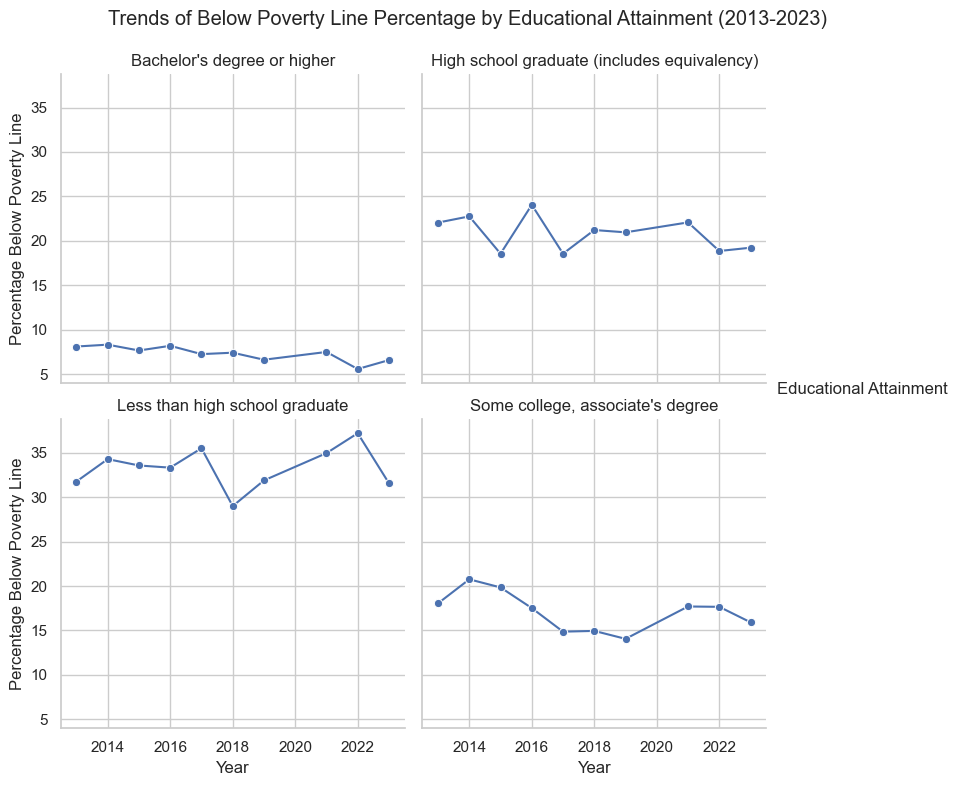

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/1857810857.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=education_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="muted")


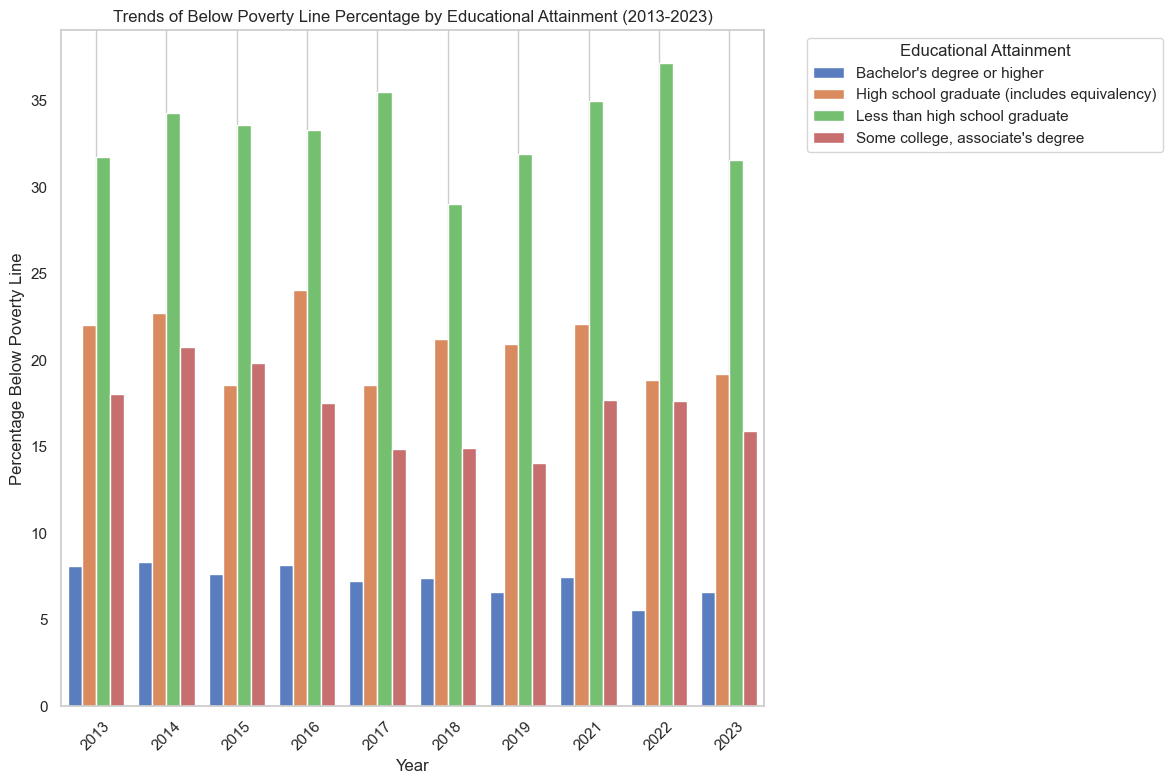

In [274]:
# education 
education_categories = [
    "Less than high school graduate",
    "High school graduate (includes equivalency)",
    "Some college, associate's degree",
    "Bachelor's degree or higher",
]

# Filter combined_df for these categories
education_df = combined_df[combined_df['label'].isin(education_categories)]

# Clean and Convert Data
# Function to clean and convert to float
def clean_and_convert(column):
    column = column.str.replace(',', '', regex=False) 
    return pd.to_numeric(column, errors='coerce') 

education_df['below_poverty_estimate'] = clean_and_convert(education_df['below_poverty_estimate'])
education_df['total_estimate'] = clean_and_convert(education_df['total_estimate'])

# Drop rows with NaN values in either column after conversion
education_df.dropna(subset=['below_poverty_estimate', 'total_estimate'], inplace=True)

# Step 3: Calculate Percentages
education_df['percent_below_poverty'] = (education_df['below_poverty_estimate'] / education_df['total_estimate']) * 100

# Group by year and educational attainment category
education_trend = education_df.groupby(['year', 'label'])['percent_below_poverty'].mean().reset_index()


# line graph plots
g = sns.FacetGrid(education_trend, col='label', col_wrap=2, height=4, sharey=True)

# Map the line plot to the grid
g.map_dataframe(sns.lineplot, x='year', y='percent_below_poverty', marker='o')

# Add titles and labels
g.set_axis_labels("Year", "Percentage Below Poverty Line")
g.set_titles(col_template="{col_name}")
g.add_legend(title='Educational Attainment')

# Add overall title
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trends of Below Poverty Line Percentage by Educational Attainment (2013-2023)")

# Show the plot
plt.show()


#bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=education_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="muted")

# Add labels and title
plt.title("Trends of Below Poverty Line Percentage by Educational Attainment (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Percentage Below Poverty Line")
plt.legend(title='Educational Attainment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Poverty trends based on employment

    Year Employment Status Below Poverty Estimate  \
0   2013          Employed                 32,911   
1   2013        Unemployed                 12,083   
2   2014          Employed                 31,656   
3   2014        Unemployed                 10,946   
4   2015          Employed                 31,646   
5   2015        Unemployed                  9,836   
6   2016          Employed                 30,044   
7   2016        Unemployed                 10,076   
8   2017          Employed                 29,260   
9   2017        Unemployed                  9,349   
10  2018          Employed                 26,890   
11  2018        Unemployed                  8,339   
12  2019          Employed                 25,315   
13  2019        Unemployed                  5,504   
14  2021          Employed                 24,490   
15  2021        Unemployed                  9,565   
16  2022          Employed                 23,039   
17  2022        Unemployed                  8,

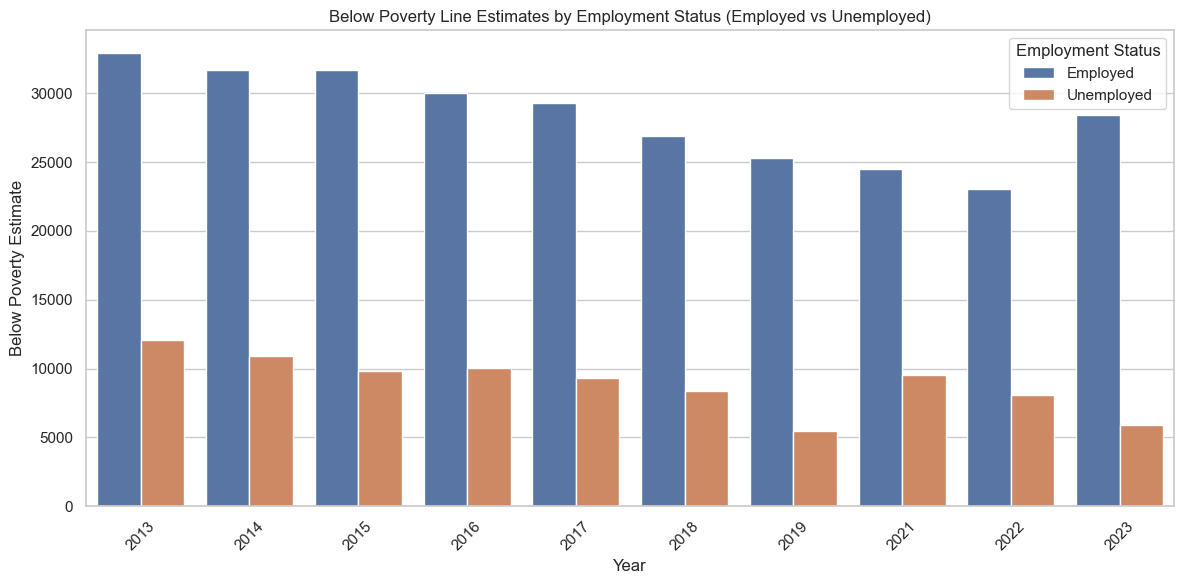

In [277]:
# Filter for employed and unemployed categories
employment_data = combined_df[
    combined_df['label'].isin(['Employed', 'Unemployed'])
]

# Create a list to hold rows for the summary DataFrame
employment_summary_rows = []

# Loop through unique years in the filtered employment data
for year in employment_data['year'].unique():
    yearly_data = employment_data[employment_data['year'] == year]

    # Extract data for Employed
    employed_row = yearly_data[yearly_data['label'] == 'Employed']
    if not employed_row.empty:
        employment_summary_rows.append({
            'Year': year,
            'Employment Status': 'Employed',
            'Below Poverty Estimate': employed_row['below_poverty_estimate'].values[0],
            'Percent Below Poverty Estimate': employed_row['percent_below_poverty_estimate'].values[0]
        })

    # Extract data for Unemployed
    unemployed_row = yearly_data[yearly_data['label'] == 'Unemployed']
    if not unemployed_row.empty:
        employment_summary_rows.append({
            'Year': year,
            'Employment Status': 'Unemployed',
            'Below Poverty Estimate': unemployed_row['below_poverty_estimate'].values[0],
            'Percent Below Poverty Estimate': unemployed_row['percent_below_poverty_estimate'].values[0]
        })

# Create a DataFrame from the list of rows
employment_summary = pd.DataFrame(employment_summary_rows)

# Display the employment summary
print(employment_summary)

employment_summary['Below Poverty Estimate'] = employment_summary['Below Poverty Estimate'].str.replace(',', '').astype(int)

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=employment_summary, 
            x='Year', 
            y='Below Poverty Estimate', 
            hue='Employment Status')

# Customize the plot
plt.title('Below Poverty Line Estimates by Employment Status (Employed vs Unemployed)')
plt.xlabel('Year')
plt.ylabel('Below Poverty Estimate')
plt.xticks(rotation=45)
plt.legend(title='Employment Status')
plt.tight_layout()

# Show the plot
plt.show()

# Poverty trends based on work experience

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_49374/3219211545.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['percent_below_poverty_estimate'] = (


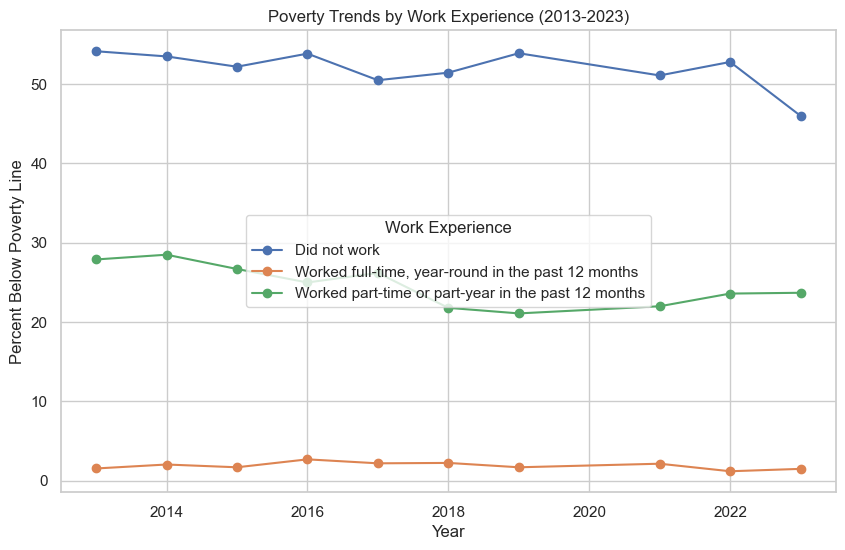

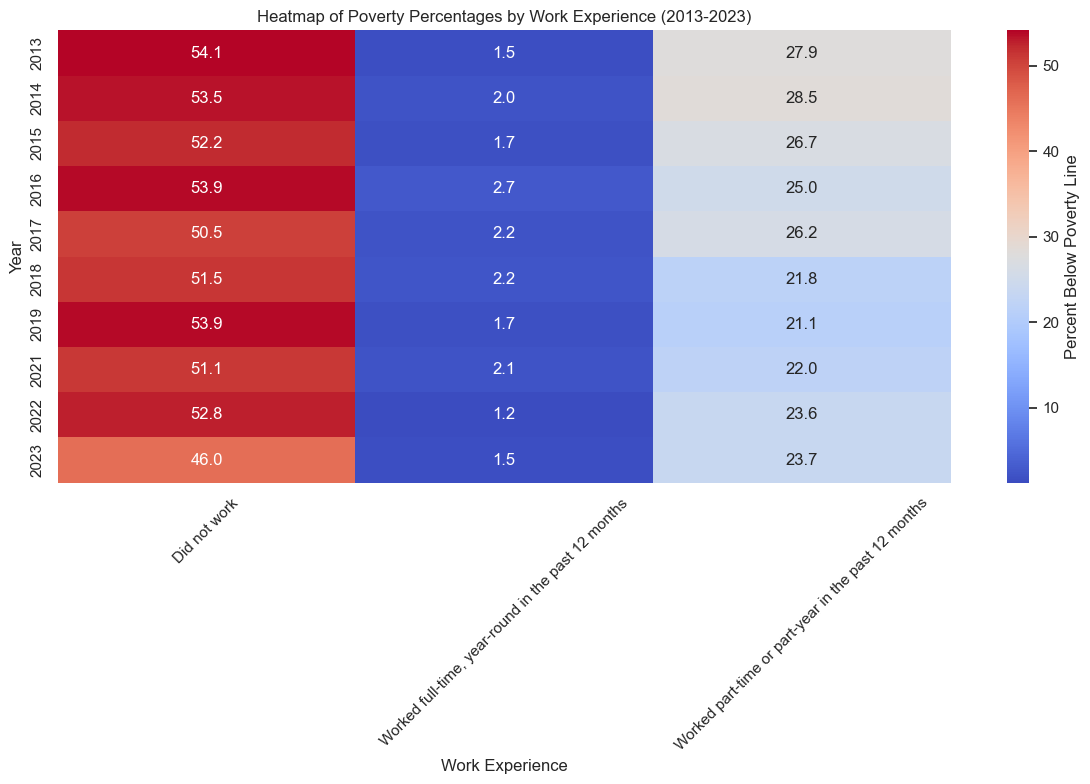

In [290]:
work_experience_categories = [
    "Worked full-time, year-round in the past 12 months",
    "Worked part-time or part-year in the past 12 months",
    "Did not work"
]
filtered_df = combined_df[combined_df['label'].isin(work_experience_categories)]

# Clean `percent_below_poverty_estimate` column by removing '%' and converting to float
filtered_df['percent_below_poverty_estimate'] = (
    filtered_df['percent_below_poverty_estimate']
    .str.replace('%', '', regex=False)
    .astype(float)
)

# pivot table for years and work experience categories
pivot_data = filtered_df.pivot_table(
    index='year',
    columns='label',
    values='percent_below_poverty_estimate'
)

# line chart for trends over years
plt.figure(figsize=(10, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)
plt.title('Poverty Trends by Work Experience (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Percent Below Poverty Line')
plt.legend(title='Work Experience')
plt.grid(True)
plt.show()

# heatmap of poverty percentages
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Percent Below Poverty Line'})
plt.title('Heatmap of Poverty Percentages by Work Experience (2013-2023)')
plt.xlabel('Work Experience')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()